<strong> File descriptions </strong>
<ul>
    <li>train.csv - the training set</li>
    <li>test.csv - the test set</li>
    <li>sampleSubmission.csv - a sample submission file in the correct format</li>
</ul>

<strong> Переменные </strong>
<ul>
    <li>Data fields</li>
    <li>Id - идентификационный номер квартиры</li>
    <li>DistrictId - идентификационный номер района</li>
    <li>Rooms - количество комнат</li>
    <li>Square - площадь</li>
    <li>LifeSquare - жилая площадь</li>
    <li>KitchenSquare - площадь кухни</li>
    <li>Floor - этаж</li>
    <li>HouseFloor - количество этажей в доме</li>
    <li>HouseYear - год постройки дома</li>
    <li>Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности</li>
    <li>Social_1, Social_2, Social_3 - социальные показатели местности</li>
    <li>Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья</li>
    <li>Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров</li>
    <li>Price - цена квартиры</li>
</ul>

<strong>Загрузка, настройка библиотек и DATAFRAMES</strong>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


<strong>Загрузка</strong>

In [21]:
train_path = 'train.csv'
test_path = 'test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [22]:
train_df.head(5).transpose()

,0,1,2,3,4
Id,11809,3013,8215,2352,13866
DistrictId,27,22,1,1,94
Rooms,3.0,1.0,3.0,1.0,2.0
Square,115.027311,39.832524,78.342215,40.409907,64.285067
LifeSquare,NaN,23.169223,47.671972,NaN,38.562517
KitchenSquare,10.0,8.0,10.0,1.0,9.0
Floor,4,7,2,10,16
HouseFloor,10.0,8.0,17.0,22.0,16.0
HouseYear,2014,1966,1988,1977,1972
Ecology_1,0.075424,0.118537,0.025609,0.007122,0.282798


In [23]:
test_df.head(5).transpose() 

,0,1,2,3,4
Id,4567,5925,960,3848,746
DistrictId,44,62,27,23,74
Rooms,1.0,1.0,2.0,3.0,1.0
Square,36.84763,42.493907,59.463678,49.64603,53.837056
LifeSquare,19.094182,42.568133,NaN,33.893825,NaN
KitchenSquare,5.0,10.0,9.0,6.0,1.0
Floor,5,7,19,2,8
HouseFloor,9.0,17.0,19.0,2.0,17.0
HouseYear,1970,2017,1977,1965,1977
Ecology_1,0.036122,0.072158,0.211401,0.014073,0.309479


<strong>Статистическая информация</strong>

In [24]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


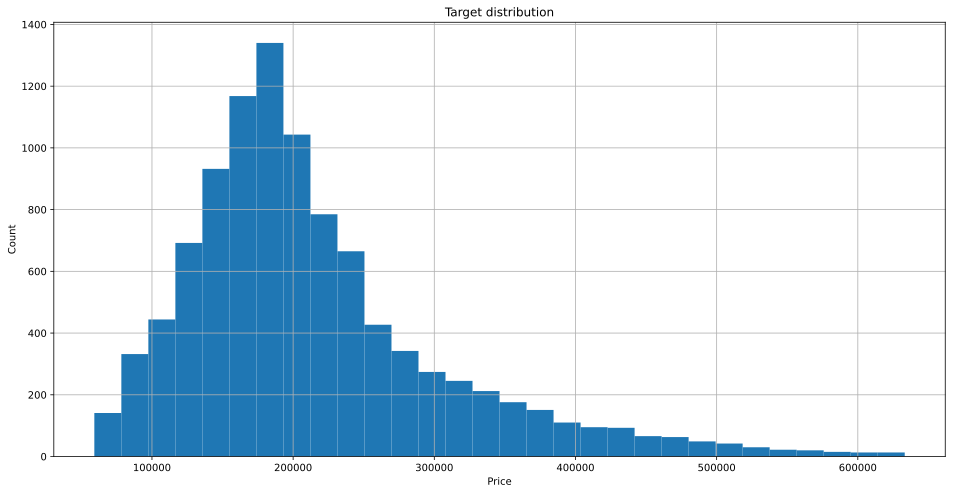

In [25]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

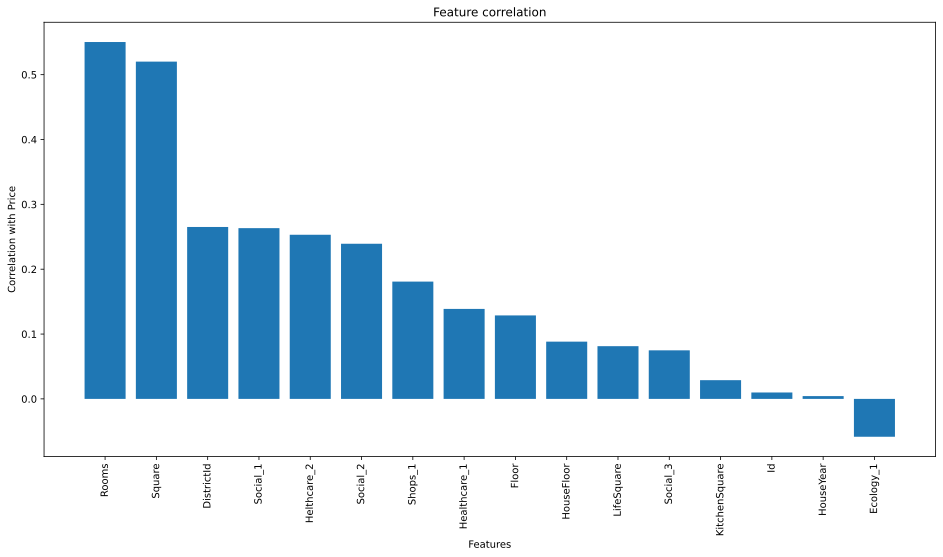

In [26]:
correlation = train_df.corrwith(train_df['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.title('Feature correlation')
plt.show()

In [27]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

<strong>Анализ выбросов и распределений</strong>

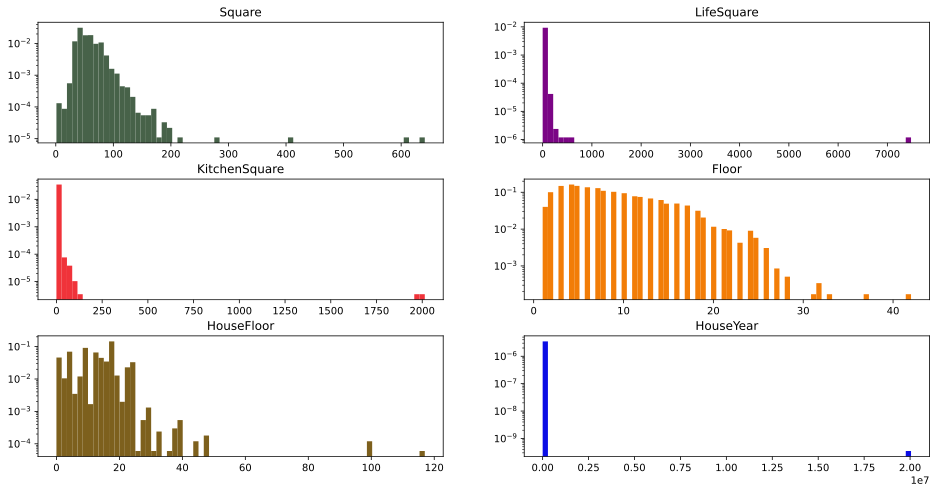

In [29]:
ax_list = ['Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear']
def plot_analize(df, ax_list):

        rows = np.ceil(len(ax_list) / 2).astype('int16')
        cols = 2

        figure, ax = plt.subplots(rows, cols, figsize=(cols,rows))
        figure.set_size_inches(16, 8)
        figure.subplots_adjust(hspace=0.3)
        axes = ax.flatten()

        for i in range(len(ax_list)):
                axes[i].hist(df[ax_list[i]], bins=70, density=True, color=np.random.rand(3,))
                axes[i].set_title(ax_list[i])
                axes[i].set_yscale('log')


        plt.show()

plot_analize(train_df, ax_list)


На графиках видно значительные выбросы значений

<strong>Реализация класса DataPreprocessor</strong>

In [30]:
class DataPreprocessor:
    def __init__(self):
        self.medians = None
        self.max_kitchen_square = None
        self.min_kitchen_square = None
        self.min_life_square = None
        self.max_floor = None
        self.districts_healthcare = None


        
    def get_self_variables(self, df):
        # Medians and quantiles
        self.medians = df.median() # medians
        self.max_kitchen_square = df['KitchenSquare'].quantile(0.999) 
        self.min_kitchen_square = df['KitchenSquare'].quantile(0.001) 
        self.min_life_square = df['LifeSquare'].quantile(0.03) 
        self.max_floor = df['Floor'].max()
        
        self.districts_healthcare = df.groupby(['DistrictId'])['Healthcare_1'].agg('mean').to_dict()


    def Preprocessor(self, df):

        #release preprocessing
        release_Square = (df['Square'] > 700)
        df.loc[release_Square, 'Square'] = self.medians.Square

        release_LifeSquare = (df['LifeSquare'] > 700)
        df.loc[release_LifeSquare, 'LifeSquare'] = self.medians.LifeSquare
        
        release_KitchenSquare = (df['KitchenSquare'] > 250)
        df.loc[release_KitchenSquare, 'KitchenSquare'] = self.medians.KitchenSquare

        # LifeSquare fillna
        df['LifeSquare'].fillna(((df['Square'] - df['KitchenSquare']) - df['Square']*0.2), inplace=True)

        # Rooms     
        df['Rooms'].fillna(self.medians.Rooms, inplace=True) 
        err_rooms = (df['Rooms'] > 6) | (df['Rooms'] == 0)   
        room_square = np.round((self.medians.LifeSquare / self.medians.Rooms, 1))[0]
        df.loc[err_rooms , 'Rooms'] = df.loc[err_rooms, 'LifeSquare'] / room_square

        # Square
        df['Square'], df['LifeSquare'] = np.where(df['Square'] < df['LifeSquare'],(df['LifeSquare'],df['Square']), (df['Square'],df['LifeSquare']))

        # LifeSquare
        err_ls = (df['LifeSquare'] < self.min_life_square)
        df.loc[err_ls, 'LifeSquare'] = df.loc[err_ls, ['Square']] - df.loc[err_ls, ['KitchenSquare']]
  
        # KitchenSquare
        err_kitchen_square = (df['KitchenSquare'] > self.max_kitchen_square) | (df['KitchenSquare'] < self.min_kitchen_square)
        df.loc[err_kitchen_square, 'KitchenSquare'] = df.loc[err_kitchen_square, 'Square'] - df.loc[err_kitchen_square, 'LifeSquare'] - (df.loc[err_kitchen_square, 'Square'] * 0.1)

        # Switch to binary
        df['Ecology_3'] = pd.get_dummies(df.Ecology_3, drop_first=True)
        df['Ecology_2'] = pd.get_dummies(df.Ecology_2, drop_first=True)
        df['Shops_2'] = pd.get_dummies(df.Shops_2, drop_first=True)
        
        # HouseFloor
        err_house_floor = df['HouseFloor'] < df['Floor']
        df.loc[err_house_floor, 'HouseFloor'] = df.loc[err_house_floor, 'Floor']

        # HouseYear
        err_year = 2022
        condition_year = (df['HouseYear'] > err_year)
        df.loc[condition_year, 'HouseYear'] = self.medians.HouseYear
        
        # Healthcare     
        df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['DistrictId'].map(self.districts_healthcare)
        df['Healthcare_1'].fillna(self.medians.Healthcare_1, inplace=True)       
        # Clip on upper quantille
        q_max = np.quantile(df['Healthcare_1'], q=0.9)
        df['Healthcare_1'].clip(upper=q_max, axis=0, inplace=True)
        
        # Drop Id
        if 'Id' in df.columns:
            df.drop(['Id'], axis=1, inplace=True)

        # Fillna just in case
        df.fillna(self.medians, inplace=True)
        return df

<strong>Предобработка train и test</strong>

In [31]:
dp = DataPreprocessor()
dp.get_self_variables(train_df)
train_df = dp.Preprocessor(train_df)
test_df = dp.Preprocessor(test_df)

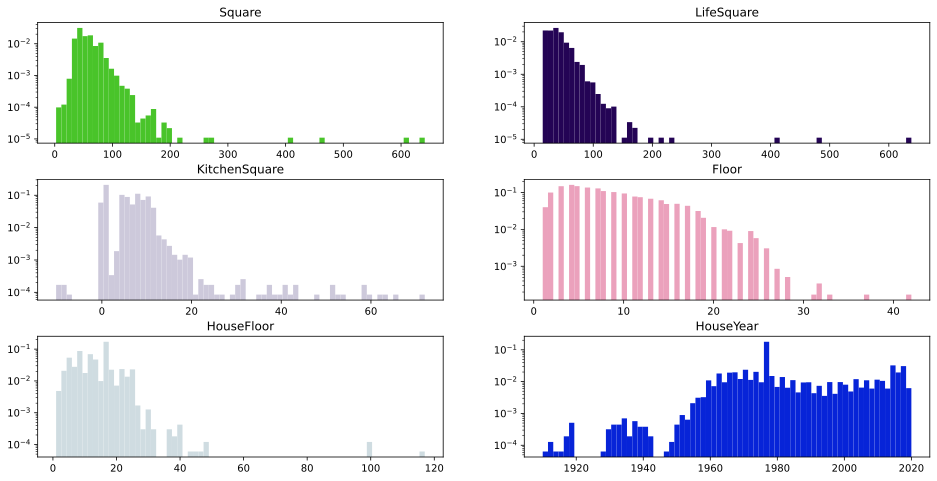

In [32]:
plot_analize(train_df, ax_list)

<strong>Обучение модели</strong>

In [33]:
x = train_df.drop('Price', axis=1)
y = train_df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
regressor.fit(x, y)

r2(y_test, y_pred)

0.7437395611919788

<strong>Предсказания </strong> 

In [34]:
y_pred = regressor.predict(test_df)
len(y_pred)

5000

<strong>Подготовка и выгрузка результатов</strong>

In [35]:
submission = pd.read_csv('sample_submission.csv')
submission['Price'] = y_pred
submission.head()
submission.to_csv('polyanskiy_submission.csv', index=False)
# submission.shape